In [221]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy

Создадим распределение:

In [222]:
class X_gen(sps.rv_continuous):
    def _pdf(self, x):
        return np.exp(-x)

X = X_gen(a = 0)

In [223]:
data = X.rvs(size=25)

In [224]:
print(f"мода: {sps.mode(data)}")
print(f"медиана: {np.median(data)}")
print(f"размах: {np.max(data) - np.min(data)}")
print(f"коэффициент асимметрии: {sps.skew(data)}")

мода: ModeResult(mode=np.float64(0.0038930345433751375), count=np.int64(1))
медиана: 0.7374568191601343
размах: 3.877691912105149
коэффициент асимметрии: 0.9301522879155119


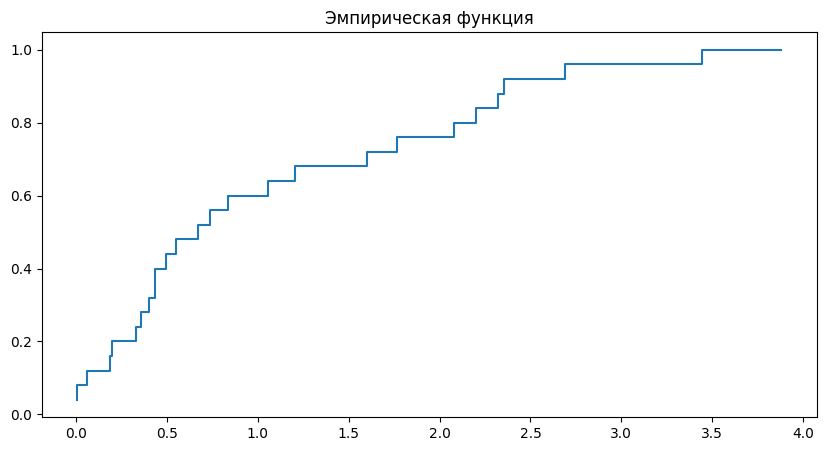

In [225]:
#Эмперическая функция
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Эмпирическая функция")
ax.step(arr, np.arange(1, len(arr) + 1) / len(arr))

(array([0.68081737, 0.30946244, 0.12378498, 0.24756995, 0.06189249,
        0.12378498]),
 array([0.00389303, 0.65017502, 1.29645701, 1.94273899, 2.58902098,
        3.23530296, 3.88158495]),
 <BarContainer object of 6 artists>)

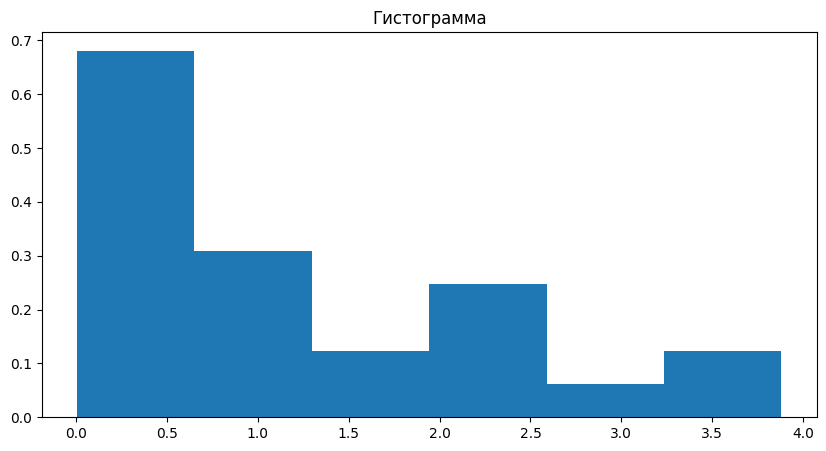

In [226]:
#Гистограмма
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c18ff79e660>,
 'caps': [<matplotlib.lines.Line2D at 0x7c18ff79ebd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c18ff894fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c18ff79f200>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c18ff79f2f0>],
 'means': []}

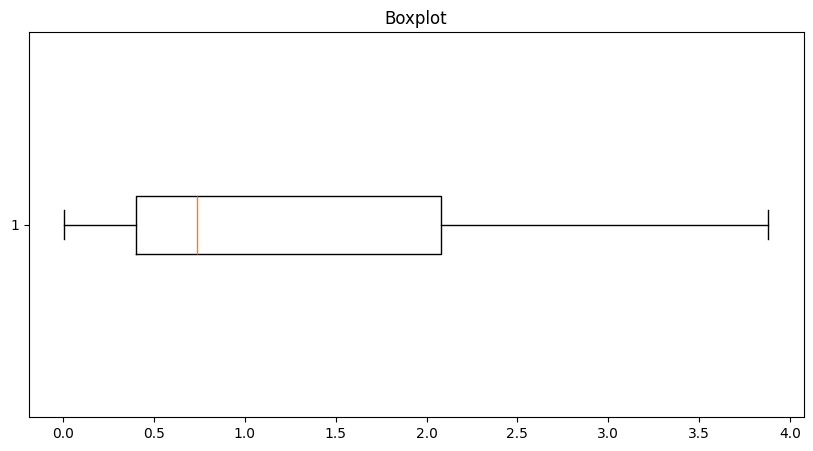

In [227]:
#Boxplot
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Boxplot")
ax.boxplot(arr, vert=False)

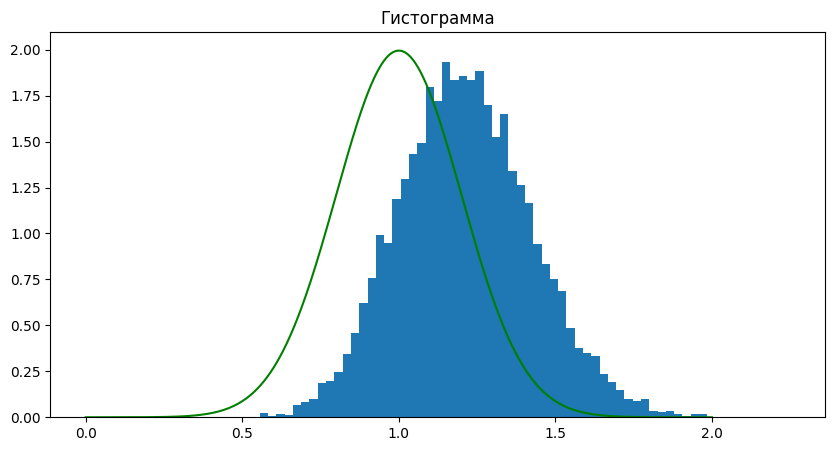

In [ ]:
#сравнение оценок плотности распределения среднего арифметического, полученных с помощью ЦПТ и bootstrap
bootstrap_means = sps.bootstrap((data, ), statistic=np.mean)

arr = np.sort(bootstrap_means.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)

sigma = 1 #дисперсия исходной сл. величины

mat_waiting = 1 #математическое ожидание исходной сл. величины

x = np.linspace(mat_waiting - sigma, mat_waiting + sigma, 1000)

#по ЦПТ и наследовании сх-ти получаем, что среднее арифметическое имеет нормальное рапределение с параметрами (1, 1/25)
ax.plot(x, sps.norm.pdf(x, 1, 0.2), color='green')



(array([0.00217018, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00217018, 0.        , 0.        , 0.00651055,
        0.02387202, 0.00651055, 0.02170184, 0.04991422, 0.04123349,
        0.05859496, 0.07595643, 0.13021102, 0.18229542, 0.22569909,
        0.25391148, 0.34288901, 0.39497342, 0.51867388, 0.58160921,
        0.71833077, 0.88109454, 0.80296793, 0.93100877, 1.00479501,
        1.12849547, 1.05687942, 1.12849547, 1.15453768, 0.98960372,
        0.95488079, 0.9136473 , 0.86590326, 0.87024363, 0.73135187,
        0.68360784, 0.58377939, 0.49914223, 0.43837709, 0.38195231,
        0.31684681, 0.27127295, 0.25608167, 0.22135873, 0.17578487,
        0.1454023 , 0.12587065, 0.11501973, 0.07812661, 0.07378624,
        0.05208441, 0.02387202, 0.04557386, 0.02170184, 0.0260422 ,
        0.01953165, 0.01736147, 0.01519129, 0.01085092, 0.00651055,
        0.00868073, 0.00651055, 0.        , 0.00217018, 0.00217018,
        0.00217018, 0.00868073, 0.00651055, 0.00

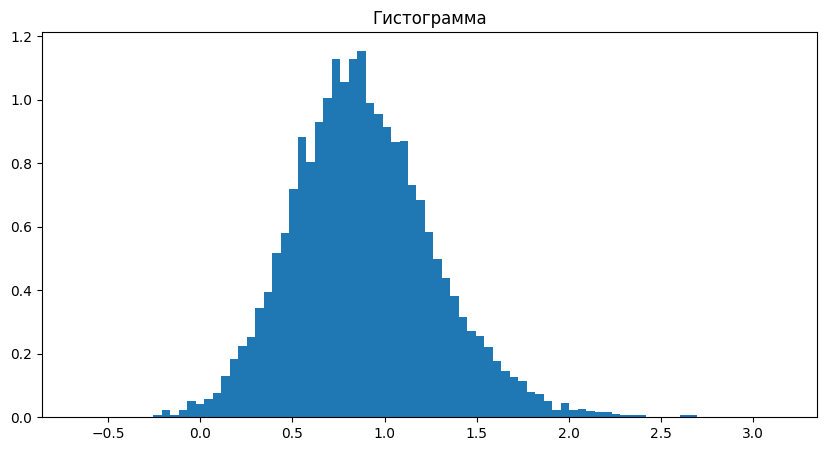

In [229]:
#бутстраповская оценка коэффициента асимметрии

bootstrap_skew = sps.bootstrap((data, ), statistic=sps.skew)

arr = np.sort(bootstrap_skew.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)


In [230]:
#вероятность того, что коэффициент асимметрии меньше единицы

count = 0

for i in bootstrap_skew.bootstrap_distribution:
    count += int(i < 1)

print(count / len(bootstrap_skew.bootstrap_distribution))

0.6407640764076408


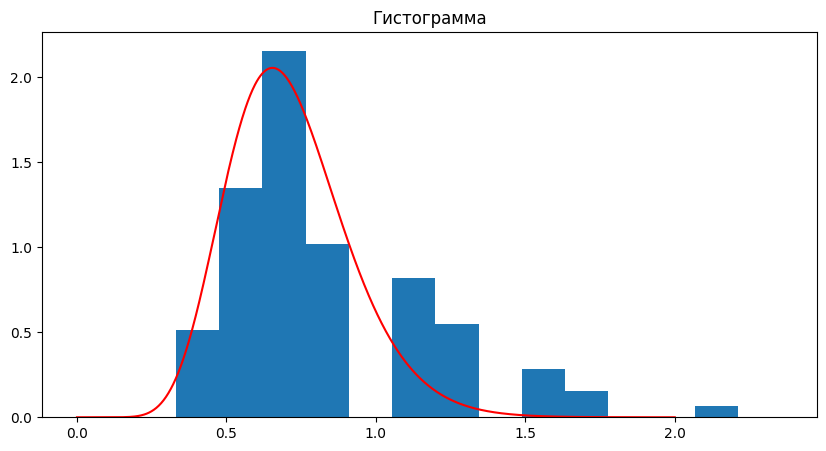

In [ ]:
#сравнение плотности медианы выборки с бутстраповской оценкой

def p_median(x):
    return 25 * np.exp(-x) * scipy.special.comb(24, 12) * (np.exp(-x)) ** 12 * (1 - np.exp(-x)) ** 12

p_median = np.vectorize(p_median)

bootstrap_median = sps.bootstrap((data, ), statistic=np.median)

arr = np.sort(bootstrap_median.bootstrap_distribution)

x = np.arange(0, 2, (max(arr) - min(arr)) / 1000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Плотность медианы выборки")
ax.hist(arr, bins=int(1 + np.log2(len(arr))), density=True)

ax.plot(x, p_median(x), color='red')